In [2]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [3]:
df=pd.read_csv('german_credit.csv')
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [6]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [4]:
#random sampling
df_sample=df.sample(frac=0.5, replace=True, random_state=1)
df_sample


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
37,1,>= 200 DM / salary assignments for at least 1 ...,18,existing credits paid back duly till now,domestic appliances,2100,... < 100 DM,1 <= ... < 4 years,4,male : single,...,2,real estate,37,stores,own,1,skilled employee / official,1,none,yes
235,1,< 0 DM,24,existing credits paid back duly till now,domestic appliances,1823,... < 100 DM,unemployed,4,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",30,stores,own,1,management/ self-employed/ highly qualified em...,2,none,yes
908,0,no checking account,15,delay in paying off in the past,car (used),3594,... < 100 DM,... < 1 year,1,female : divorced/separated/married,...,2,if not A121 : building society savings agreeme...,46,none,own,2,unskilled - resident,1,none,yes
72,0,< 0 DM,8,critical account/ other credits existing (not ...,furniture/equipment,1164,... < 100 DM,.. >= 7 years,3,male : single,...,4,unknown / no property,51,bank,for free,2,management/ self-employed/ highly qualified em...,2,"yes, registered under the customers name",yes
767,0,no checking account,10,existing credits paid back duly till now,car (used),2901,unknown/ no savings account,... < 1 year,1,female : divorced/separated/married,...,4,real estate,31,none,rent,1,skilled employee / official,1,none,yes
905,0,< 0 DM,12,existing credits paid back duly till now,domestic appliances,1107,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,real estate,20,none,rent,1,management/ self-employed/ highly qualified em...,2,"yes, registered under the customers name",yes
715,0,no checking account,30,critical account/ other credits existing (not ...,car (used),7596,unknown/ no savings account,.. >= 7 years,1,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",63,none,own,2,skilled employee / official,1,none,yes
645,1,no checking account,36,delay in paying off in the past,business,7980,unknown/ no savings account,... < 1 year,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",27,none,rent,2,skilled employee / official,1,"yes, registered under the customers name",yes
847,0,no checking account,24,existing credits paid back duly till now,car (new),1249,... < 100 DM,... < 1 year,4,male : married/widowed,...,2,real estate,28,none,own,1,skilled employee / official,1,none,yes
960,0,no checking account,6,critical account/ other credits existing (not ...,domestic appliances,1740,... < 100 DM,.. >= 7 years,2,male : married/widowed,...,2,real estate,30,none,rent,2,skilled employee / official,1,none,yes


In [5]:
# Lets build a Ensemble model but need to modify the dataset first
df_sample.shape

(500, 21)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [7]:
df_sample = pd.get_dummies(df_sample)
# Print Shape of model data
df_sample

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
37,1,18,2100,4,2,37,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
235,1,24,1823,4,2,30,1,2,0,1,...,1,0,1,0,0,0,1,0,0,1
908,0,15,3594,1,2,46,2,1,0,0,...,1,0,0,0,0,1,1,0,0,1
72,0,8,1164,3,4,51,2,2,0,1,...,0,0,1,0,0,0,0,1,0,1
767,0,10,2901,1,4,31,1,1,0,0,...,0,1,0,1,0,0,1,0,0,1
905,0,12,1107,2,2,20,1,2,0,1,...,0,1,1,0,0,0,0,1,0,1
715,0,30,7596,1,4,63,2,1,0,0,...,1,0,0,1,0,0,1,0,0,1
645,1,36,7980,4,4,27,2,1,0,0,...,0,1,0,1,0,0,0,1,0,1
847,0,24,1249,4,2,28,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
960,0,6,1740,2,2,30,2,1,0,0,...,0,1,0,1,0,0,1,0,0,1


In [8]:
df_sample.shape

(500, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [9]:
df_sample.corr()


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.209576,0.153729,0.087092,-0.027214,-0.124569,-0.074034,-0.017268,0.139463,2.948792e-01,...,-0.060248,0.099987,0.008734,-0.044072,-0.030504,0.056882,0.095724,-0.095724,-8.209391e-02,8.209391e-02
duration_in_month,0.209576,1.000000,0.601423,0.193263,0.020343,-0.082814,-0.052772,-0.094155,0.184361,-4.711433e-02,...,0.017372,-0.045558,0.177307,0.052099,-0.037982,-0.214409,-0.125270,0.125270,-1.672361e-01,1.672361e-01
credit_amount,0.153729,0.601423,1.000000,-0.209941,0.071161,0.019249,0.059633,-0.037262,0.161414,-4.344449e-02,...,-0.017696,-0.032326,0.338707,-0.071749,-0.091730,-0.191534,-0.251393,0.251393,-8.583332e-02,8.583332e-02
installment_as_income_perc,0.087092,0.193263,-0.209941,1.000000,-0.033001,0.054836,-0.055380,-0.091998,-0.029130,-8.460497e-03,...,0.050081,-0.073764,0.072355,0.036685,-0.076886,-0.085386,-0.043898,0.043898,-5.545870e-02,5.545870e-02
present_res_since,-0.027214,0.020343,0.071161,-0.033001,1.000000,0.220551,0.111122,-0.001918,-0.058496,4.223049e-02,...,-0.253246,0.148065,-0.054415,0.016081,0.078497,0.003179,-0.094643,0.094643,-3.193492e-02,3.193492e-02
age,-0.124569,-0.082814,0.019249,0.054836,0.220551,1.000000,0.122202,0.105544,-0.115140,-2.524580e-02,...,0.017603,-0.180762,0.119243,-0.163648,0.196421,0.024605,-0.167097,0.167097,2.115612e-02,-2.115612e-02
credits_this_bank,-0.074034,-0.052772,0.059633,-0.055380,0.111122,0.122202,1.000000,0.129449,-0.113930,-4.319104e-02,...,0.034639,-0.035709,-0.022265,0.032257,0.156523,-0.073264,-0.029820,0.029820,7.700187e-02,-7.700187e-02
people_under_maintenance,-0.017268,-0.094155,-0.037262,-0.091998,-0.001918,0.105544,0.129449,1.000000,-0.084667,6.271044e-02,...,-0.061788,-0.015197,0.014081,-0.069099,-0.005295,0.074170,0.014681,-0.014681,8.074549e-02,-8.074549e-02
account_check_status_0 <= ... < 200 DM,0.139463,0.184361,0.161414,-0.029130,-0.058496,-0.115140,-0.113930,-0.084667,1.000000,-3.696439e-01,...,0.034760,-0.025747,0.073960,-0.093425,-0.080251,0.074921,-0.002804,0.002804,-1.046046e-02,1.046046e-02
account_check_status_< 0 DM,0.294879,-0.047114,-0.043444,-0.008460,0.042230,-0.025246,-0.043191,0.062710,-0.369644,1.000000e+00,...,-0.132316,0.159667,-0.071751,0.025435,0.016082,0.029092,0.151599,-0.151599,2.616523e-17,1.343716e-17


In [12]:
# Create correlation matrix
corr_matrix = df_sample.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop


['other_installment_plans_none',
 'telephone_yes, registered under the customers name ',
 'foreign_worker_yes']

### Drop the original variables which are converted to dummy

In [0]:
#these columns will be automatically dropped while using get_dummies

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [15]:
# Copy all the predictor variables into X dataframe. Since 'default' is dependent variable drop it
X = df_sample.drop('default', axis=1)

# Copy the 'default' column alone into the y dataframe. This is the dependent variable
y = df_sample[['default']]

print(X)
print(y)

     duration_in_month  credit_amount  installment_as_income_perc  \
37                  18           2100                           4   
235                 24           1823                           4   
908                 15           3594                           1   
72                   8           1164                           3   
767                 10           2901                           1   
905                 12           1107                           2   
715                 30           7596                           1   
645                 36           7980                           4   
847                 24           1249                           4   
960                  6           1740                           2   
144                 21           2288                           4   
129                 12           3499                           3   
972                 24           1193                           1   
583                 36           2

In [17]:
#splitting the data into 70:30 from df_sample (which is 500 records)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 61)
(150, 61)
(350, 1)
(150, 1)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(x_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [50]:
y_predict = rfcl.predict(x_test)
print('Accuracy score :',rfcl.score(x_test , y_test))

# calculate accuracy measures and confusion matrix
from sklearn import metrics
print('Confusion matrix')
print(metrics.confusion_matrix(y_test, y_predict))

Accuracy score : 0.78
Confusion matrix
[[89 18]
 [15 28]]


### Q6 Show the list of the features importance( 1 Marks)

In [24]:
print(pd.DataFrame(rfcl.feature_importances_,columns=['Cols'],index=x_train.columns))

                                                        Cols
duration_in_month                                   0.068725
credit_amount                                       0.098598
installment_as_income_perc                          0.034641
present_res_since                                   0.033714
age                                                 0.076857
credits_this_bank                                   0.017407
people_under_maintenance                            0.008387
account_check_status_0 <= ... < 200 DM              0.015977
account_check_status_< 0 DM                         0.030590
account_check_status_>= 200 DM / salary assignm...  0.007962
account_check_status_no checking account            0.057168
credit_history_all credits at this bank paid ba...  0.010683
credit_history_critical account/ other credits ...  0.025273
credit_history_delay in paying off in the past      0.009067
credit_history_existing credits paid back duly ...  0.015216
credit_history_no credit

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [26]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [27]:
cv=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
acc_ran = cross_val_score(rfcl,X,y,cv=cv)
print(acc_ran)

[0.86 0.8  0.86 0.8  0.92 0.88 0.9  0.8  0.9  0.76]


In [0]:
#Calculate Mean score

In [29]:
print(np.mean(acc_ran))

0.8480000000000001


In [0]:
# Calculate score standard deviation using std()

In [30]:
print(np.std(acc_ran))

0.0515363949069005


# Q8 Print the confusion matrix( 1 Marks)

In [31]:
from sklearn.model_selection import cross_val_predict
cv_predict = cross_val_predict(rfcl,X,y,cv=10)
print(pd.DataFrame(metrics.confusion_matrix(cv_predict,y)))

     0    1
0  308   55
1   28  109


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [34]:
from sklearn.metrics import classification_report
print("classification_report :\n",classification_report(y_test, y_predict,target_names =['Default', 'Non-Default']))

classification_report :
               precision    recall  f1-score   support

     Default       0.91      0.85      0.88       107
 Non-Default       0.68      0.79      0.73        43

   micro avg       0.83      0.83      0.83       150
   macro avg       0.80      0.82      0.81       150
weighted avg       0.84      0.83      0.84       150



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [38]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
y_predictProb = rfcl.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9393610084764181

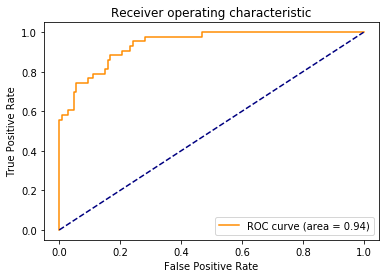

In [39]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [41]:
auc = metrics.auc(fpr, tpr)
print("Area under curve: ",auc)

Area under curve:  0.9393610084764181


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [42]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [47]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(x_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [48]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.818
Standard deviation:  0.023103631268217947
